# Intro to plotting with matplotlib
![](https://matplotlib.org/_static/logo2.svg)

Matplotlib is a popular open source 2D plotting library for Python, modeled after Matlab. There are two approaches of using this - functional approach & objected-oriented approach. The latter is preferred.

**ToC**
 - [importing](#importing)
 - [Functional plotting](#Functional-plotting)
   - [subplots](#subplots)
 - [Object oriented plotting](#Object-oriented-plotting)
   - [multiplots](#multiplots)
     - [Creating side by side plots](#Creating-side-by-side-plots)
   - [Easier subplots](#Easier-subplots)
   - [Figsize](#Figsize)
   - [Saving your plots](#Saving-your-plots)
   - [Labels and legends](#Labels-and-legends)
 - [Decorating with colors markers transparency](#Decorating-with-colors-markers-transparency)
 - [Set limits on axes](#Set-limits-on-axes)
 - [pie charts](#pie-charts)

## importing

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Let us create some data for X and Y for the plots

In [12]:
x = list(range(0,100))
y = list(map(lambda x:x**2, x))

## Functional plotting
Call the plotting as functions.

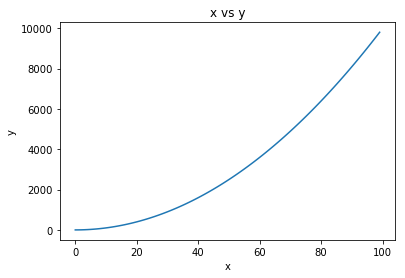

In [14]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

### subplots
Use `subplot` method and specify `nrows`, `ncols`, `plot number` as arguments. Thus specify (1,2,1) for two plots side by side, (2,2,1) for four plots like quadrants.

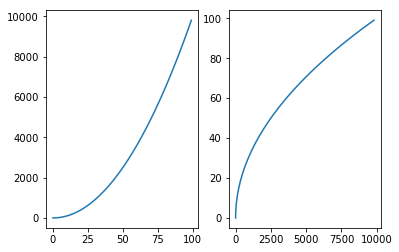

In [15]:
plt.subplot(1,2,1) #one row, 2 cols, 1st plot:
plt.plot(x,y)

plt.subplot(1,2,2) #the second plot:
plt.plot(y,x)

## Object oriented plotting
Here we create a `figure` object, set `axes`, then add plots to it. 

Specify the axes as a list of a rectangle's `[left, bottom, width, height]`. The values always range from `0-1`.

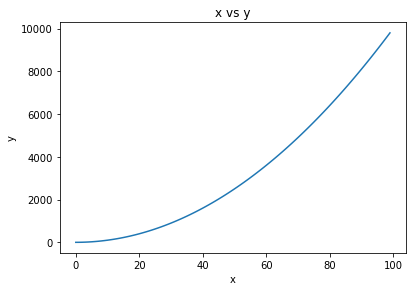

In [23]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8]) #rectangle's [left, bottom, width, height]
ax.plot(x,y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('x vs y')

### multiplots
You can create multiple plots, subplots, insert plots easily in OO approach once the axes is defined.

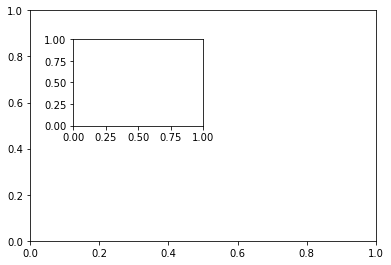

In [25]:
fig2 = plt.figure()
ax1 = fig2.add_axes([0.1,0.1,0.8,0.8])

ax_ins = fig2.add_axes([0.2,0.5,0.3,0.3]) #insert in upper left side of plot

Consider the rectangle has max length and width = 1. You can create the first plot as big as you want filling this canvas. Then create the second sort of independent of first, using the same canvas coordinates.

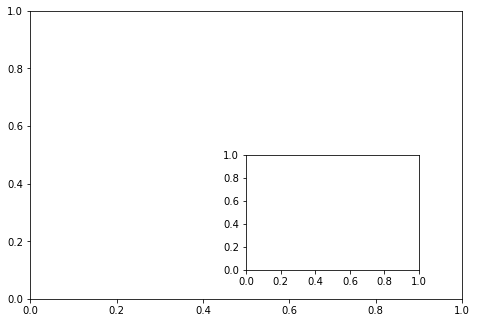

In [26]:
fig3 = plt.figure()
ax1 = fig3.add_axes([0,0,1,1]) #absolute - full size fig

ax_ins = fig3.add_axes([0.5,0.1,0.4,0.4]) #insert in lower right side of plot

#### Creating side-by-side plots

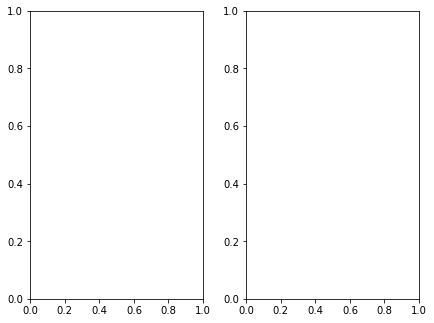

In [27]:
fig3 = plt.figure()
ax1 = fig3.add_axes([0,0,0.4,1]) # about half in width, full height

ax2 = fig3.add_axes([0.5,0,0.4,1]) #same, but to the right

### Easier subplots
If you are going to be doing side-by-side subplots, then use the easier API as shown below. Matplotlib will auto arrange the axes and plots for you.

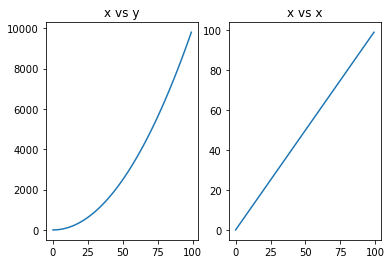

In [30]:
fig, axes = plt.subplots(nrows=1,ncols=2)

axes[0].plot(x,y)
axes[0].set_title('x vs y')

axes[1].plot(x,x)
axes[1].set_title('x vs x')

### Figsize
Specify the figure size of the plots. You specify this in `inches`.

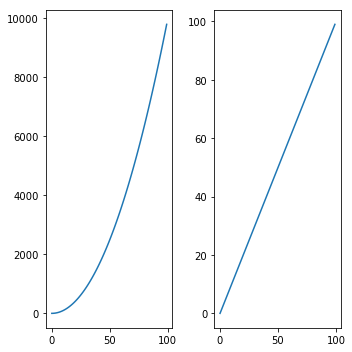

In [33]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(5,5)) #specifying as **kwargs
axes[0].plot(x,y)
axes[1].plot(x,x)

#use tight layout to resize plots within the canvas so there is no overlaps
fig.tight_layout()

### Saving your plots
call the `savefig()` method of `figure` object

In [34]:
fig.savefig('my_plots.png', dpi=300)

### Labels and legends
You can add legend to the `axis` object. You first populate the `label` property of the plot for any text to show up in the legend as shown below:

When inserting a legend, you can specify `loc=0` for auto positioning. Value `loc=1` is upper right, `loc=2` is upper left and so on.

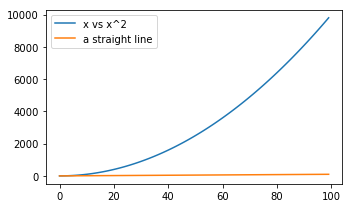

In [38]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5,3)) #just 1 large plot
axes.plot(x,y, label='x vs x^2')
axes.plot(x,x, label ='a straight line')
axes.legend(loc=0) #loc=0 corresponds to best position available.

#use tight layout to resize plots within the canvas so there is no overlaps
fig.tight_layout()


**Note** : `fig.suplots()` does not always return a vector `axis` object array. As shown above, if you have just 1 plot, it has only 1 axis object.

## Decorating with colors markers transparency
You can go town here and do the full customization, however it is adviced to use a higher level plotting API like seaborn if you find yourself writing a lot of styling code. The `plot()` method accepts a lot of these arguments

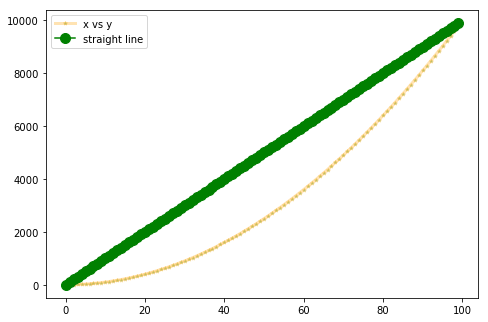

In [51]:
#linewidth or lw - ranges from 1 (default) to any high up
#colors - takes names and HTML notations
#alpha - is for transparency and ranges from [0-1]
#marker - for tick marks and specify in characters
#markersize
#markerfacecolor
#markeredgecolor
#markeredgewidth

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
st_line = list(range(0,10000, 100))

ax.plot(x,y,color='orange', linewidth='3', alpha=0.3, marker='*',
       markersize=4, markerfacecolor='green', label='x vs y')

ax.plot(x,st_line, color='green', marker='o', markersize=10, markerfacecolor='green',
       label='straight line')
ax.legend()

## Set limits on axes
In the chart above, if you want to zoom and only show the chart for values from 0-20 on X you can do so by limiting the axes. You can also set it such that the axes extends beyond the range of your data

(0, 3000)

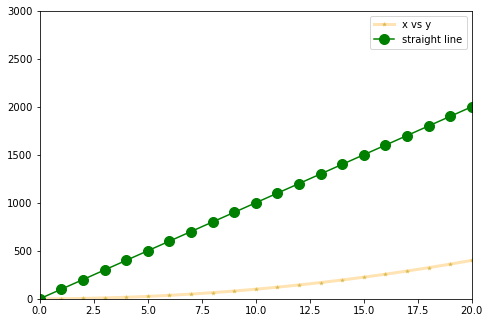

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
st_line = list(range(0,10000, 100))

ax.plot(x,y,color='orange', linewidth='3', alpha=0.3, marker='*',
       markersize=4, markerfacecolor='green', label='x vs y')

ax.plot(x,st_line, color='green', marker='o', markersize=10, markerfacecolor='green',
       label='straight line')
ax.legend()

ax.set_xlim(0,20)
ax.set_ylim(0,3000)

### pie charts
You need to send values for pie charts as numbers. You cannot pass a text column and expect matplotlib to count values and make a pie out of it.

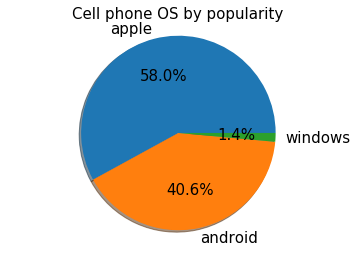

In [3]:
values = [400, 280, 10]
labels = ['apple', 'android', 'windows']

# you can just call plt.pie. However it prints a bunch of objs on the notebook. I do this just to suppress that.
fix, ax1 = plt.subplots()

# you get the returns from ax1.pie because the font is tiny and to make it bigger
# the autopct is to get the percentage values.
_, texts, autotexts = ax1.pie(values, labels=labels, shadow=True, autopct='%1.1f%%')

# make the font bigger by calling set_fontsize method each obj in texts, autotexts
list(map(lambda x:x.set_fontsize(15), texts))
list(map(lambda x:x.set_fontsize(15), autotexts))

# by default the pie has a perspective. so you here you make it flat
ax1.axis('equal')
ax1.set_title('Cell phone OS by popularity', fontsize=15)